In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_train_f=x_train.reshape(len(x_train),28*28)
x_test_f=x_test.reshape(len(x_test),28*28)

In [7]:
#building a model with only inputs and outpus -----Activation func
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)
model.fit(x_train_f,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 9.8776 - accuracy: 0.8418
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1583 - accuracy: 0.8785
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.6414 - accuracy: 0.8842
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5221 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3642 - accuracy: 0.8868


In [8]:
model.evaluate(x_test_f,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 5.9896 - accuracy: 0.8874


[5.989582538604736, 0.8873999714851379]

In [9]:
#After Scaling The Data
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train_f=x_train.reshape(len(x_train),28*28)
x_test_f=x_test.reshape(len(x_test),28*28)


In [11]:
#Building a model after Scaling the data
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)
model.fit(x_train_f,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4733 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3045 - accuracy: 0.9145
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2835 - accuracy: 0.9218
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2736 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9257


In [12]:
model.evaluate(x_test_f,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2704 - accuracy: 0.9259


[0.2703855335712433, 0.9258999824523926]

In [13]:
#Building a model using Hidden Layers
#Building a model after Scaling the data
model=keras.Sequential([
    keras.layers.Dense(150,input_shape=(784,),activation='sigmoid'),
    keras.layers.Dense(100,activation='sigmoid'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)
model.fit(x_train_f,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4205 - accuracy: 0.8880
Epoch 2/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1654 - accuracy: 0.9508
Epoch 3/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1145 - accuracy: 0.9652
Epoch 4/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0850 - accuracy: 0.9748
Epoch 5/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0651 - accuracy: 0.9807
Epoch 6/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0513 - accuracy: 0.9842


In [14]:
model.evaluate(x_test_f,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9734


[0.08517390489578247, 0.9733999967575073]

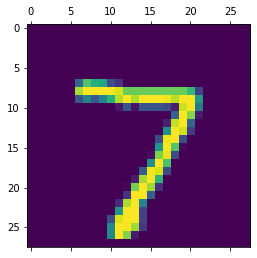

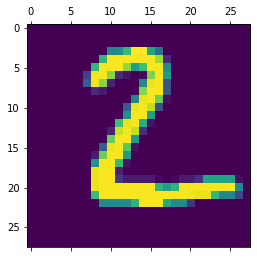

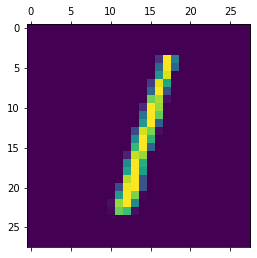

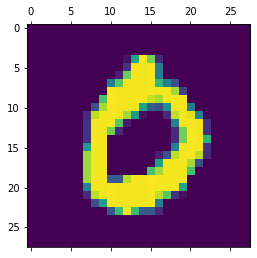

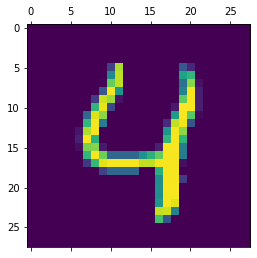

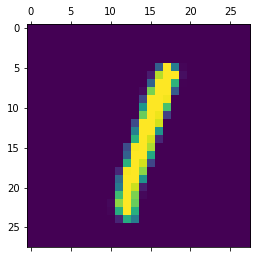

In [15]:
for i in range(0,6):
    plt.matshow(x_test[i])

In [16]:
y_pred=model.predict(x_test_f)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [18]:
y_pred_labels[0:5]

[7, 2, 1, 0, 4]

In [19]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [20]:
cm=tf.math.confusion_matrix(y_test,y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    5,    3,    1,    5,    0,    3,    3,    6],
       [   0, 1121,    3,    2,    0,    1,    1,    1,    6,    0],
       [   1,    0, 1011,    9,    1,    0,    2,    4,    4,    0],
       [   0,    0,    0,  999,    0,    0,    0,    3,    4,    4],
       [   0,    0,    2,    1,  959,    0,    3,    0,    2,   15],
       [   2,    1,    0,   23,    1,  856,    1,    1,    4,    3],
       [   4,    3,    2,    1,    8,    8,  922,    0,   10,    0],
       [   0,    3,   14,    9,    3,    0,    0,  987,    0,   12],
       [   1,    0,    3,    6,    5,    3,    2,    3,  949,    2],
       [   0,    4,    0,    7,   10,    5,    0,    5,    2,  976]])>

Text(69.0, 0.5, 'True Values')

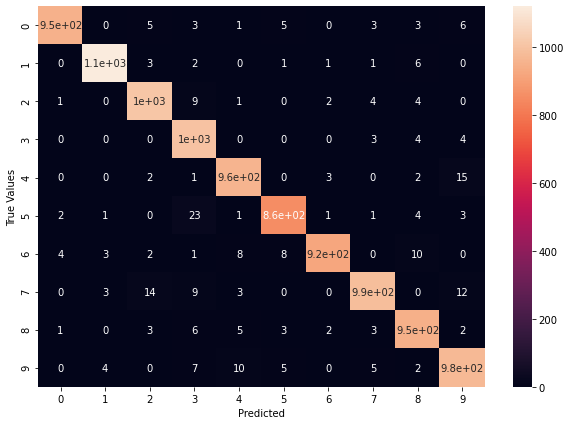

In [21]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel('True Values')

In [22]:
#Flattening the data using keras method
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='SparseCategoricalCrossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4660 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3031 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2829 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9262
